<a href="https://colab.research.google.com/github/arjunjanamatti/deep_learning/blob/master/chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 4.9 MB/s 
     |████████████████████████████████| 4.7 MB 54.2 MB/s 
     |████████████████████████████████| 1.3 MB 54.6 MB/s 
     |████████████████████████████████| 365 kB 57.0 MB/s 
     |████████████████████████████████| 101 kB 10.6 MB/s 
     |████████████████████████████████| 141 kB 56.5 MB/s 
     |████████████████████████████████| 115 kB 46.8 MB/s 
     |████████████████████████████████| 212 kB 47.6 MB/s 
     |████████████████████████████████| 596 kB 45.5 MB/s 
     |████████████████████████████████| 127 kB 63.2 MB/s 
     |████████████████████████████████| 6.6 MB 41.5 MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
urls = search_images_ddg('crocodile_photos', max_images=1)
len(urls), urls[0]

(1,
 'https://c.pxhere.com/photos/99/f7/crocodile_reptile_animal_animals_head-613889.jpg!d')

In [ ]:
dest = Path('crocodile.png')
if not dest.exists(): 
  download_url(urls[0], dest, show_progress=True)

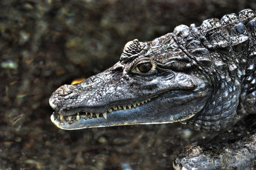

In [ ]:
croc_image = Image.open(dest)
croc_image.to_thumb(256, 256)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
searches = 'alligator', 'crocodile'
path = Path('/content/drive/MyDrive/alligator_or_crocodile')

import os
if path.exists():
  for o in searches:
    dest = (path/o)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls = results[:200])


In [ ]:
if path.exists():
  for o in searches:
    dest = (path/o)
    print(os.listdir(dest))
    for file in os.listdir(dest):
      resize_image(file, dest, max_size=400)

['de3ae67d-2b28-47c6-8931-07bf14783548.jpg', '1f897884-894b-4405-8d50-d06fad53c953.jpg', '0888e36a-b5ad-4935-ab37-c3c8a9f456e4.jpg', 'cf50bca9-3451-4ee8-b79b-8d57706cb9d9.jpg', 'd7132785-a8ba-4f9e-9815-ba48b9989fef.jpg', 'ac025134-5ee7-4afb-af22-dbd9a4e8e852.jpg', '4cc898f7-205c-4516-acd1-b6805d10be31.jpeg', 'd5b1ecc7-7040-4554-899b-8d8033075fd1.jpg', 'e6428600-6233-416c-bc90-91b946f311ff.jpg', 'ce3e90ce-06f6-44c0-8575-4bff6c4ffa62.jpg', 'e8d232ba-0560-4185-82fe-39b57119f10e.jpg', '1e587002-c42e-4bfc-8194-7be68ed484f3.jpg', '5bae6f33-0df5-4ee1-87cc-c921b8b2ce72.jpg', '4925b683-35dc-4811-bce3-6c7550681fc5.jpg', '532dbb7d-c8f7-497f-89ae-2aff13d4dcdc.jpg', 'd69a4db1-9ec0-44a8-bf9b-e0c69dcf6754.jpg', 'd2441897-083f-4c3f-815b-d12509b7f580.jpg', 'af8eb361-c21a-4ed1-ab18-dd383d35d6dc.jpg', '357933a7-2295-4b2e-aeff-3af12907306f.jpg', '1789d6d8-dfc5-4072-82f4-e590cb3c6a36.jpg', '5b625758-08de-453e-83e6-15de01d109fe.jpg', 'c20a800f-2cd9-4483-8f6a-9de03c06e901.png', 'cc803867-71d6-4019-97cb-98d1d

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#7) [None,None,None,None,None,None,None]

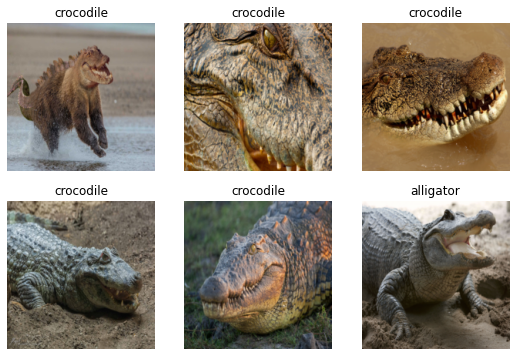

In [ ]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.201233,0.686202,0.299107,02:56


epoch,train_loss,valid_loss,error_rate,time
0,0.736836,0.549015,0.218750,03:52
1,0.594697,0.581218,0.174107,03:49
2,0.460419,0.606224,0.205357,03:57


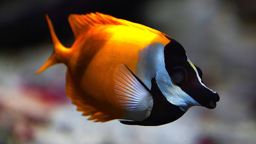

In [ ]:
urls = search_images_ddg('fish_photos', max_images=1)
# len(urls), urls[0]
dest = Path('fish.png')
if not dest.exists(): 
  download_url(urls[0], dest, show_progress=True)
croc_image = Image.open(dest)
croc_image.to_thumb(256, 256)

In [ ]:
is_do, _ , probs = learn.predict(PILImage.create('crocodile.png'))
print(f'Probability of this being a crocodile is : {probs[0]}')

Probability of this being a crocodile is : 0.8487815260887146


In [ ]:
is_do, _ , probs = learn.predict(PILImage.create('fish.png'))
print(f'Probability of this being a crocodile is : {probs[0]}')

Probability of this being a crocodile is : 0.9401566386222839
